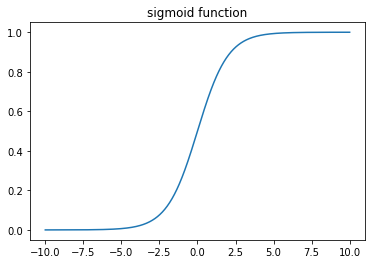

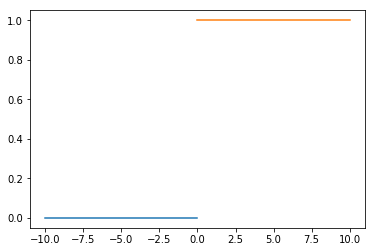

In [76]:
# -*- coding: UTF-8 -*-
import re
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-10,10,1000)
y=[1/(1+np.exp(-i)) for i in x]
plt.plot(x,y)
plt.title("sigmoid function")
plt.show()

x1 = np.linspace(-10,0,500)
y1 = np.zeros(500)
x2 = np.linspace(0,10,500)
y2 = np.ones(500)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

0.023958206176757812
0.01752614974975586


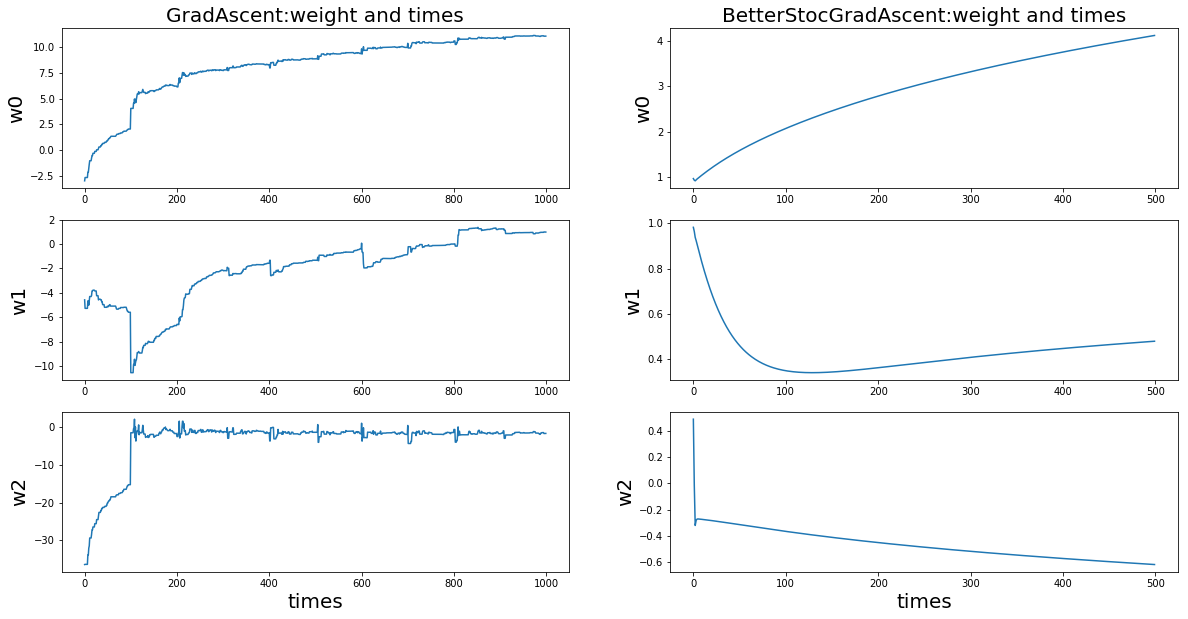

/Users/wxp/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


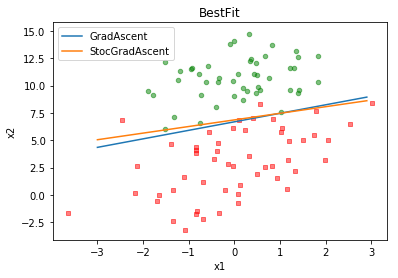

In [141]:
import time; 
"""
从 testSet.txt 中加载数据
"""
def loadDataSet():
    dataMat = []                                                        #创建数据列表
    labelMat = []                                                       #创建标签列表
    fr = open('testSet.txt')                                            #打开文件   
    for line in fr.readlines():                                         #逐行读取
        lineArr = line.strip().split()                                  #去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])          #添加数据(x,y)
        labelMat.append(int(lineArr[2]))                                #添加标签(分类结果)
    fr.close()                                                          #关闭文件
    return dataMat, labelMat                                            #返回

"""
绘制数据点图
"""
def plotDataSet():
    dataMat, labelMat = loadDataSet()                                   #加载数据集
    dataArr = np.array(dataMat)                                         #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                            #数据个数
    xcord1 = []; ycord1 = []                                            #正样本
    xcord2 = []; ycord2 = []                                            #负样本
    for i in range(n):                                                  #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])    #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                           #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5,label='1') #绘制1样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5,label='0')             #绘制0样本
    plt.legend()
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('x1'); plt.ylabel('x2')                                  #绘制label
    plt.show()                                                          #显示

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    weights_array = np.array([])
    dataMatrix = np.mat(dataMatIn)                                       #变量转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                           #标签转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                          #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001                                                        #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                      #最大迭代次数
    weights = np.ones((n,1))                                             #weights就是要求的特征系数w，全部初始化为1
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                #梯度上升矢量化公式
        dY = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * dY          #对w执行梯度更新
        weights_array = np.append(weights_array,weights)
    weights_array = weights_array.reshape(maxCycles,n)    
    return weights.getA(),weights_array                                         #将矩阵转换为数组，返回权重数组

def stocGradAscentBetter(dataMatrix, classLabels, numIter=5):
    m,n = np.shape(dataMatrix)                                                  #返回dataMatrix的大小。m为行数,n为列数。
    weights = np.ones(n)                                                        #参数初始化
    weights_array = np.array([]) 
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01                                            #降低alpha的大小，每次减小1/(j+i)。
            randIndex = int(random.uniform(0,len(dataIndex)))                   #随机选取样本
            h = sigmoid(sum(dataMatrix[randIndex]*weights))                     #选择随机选取的一个样本，计算h
            error = classLabels[randIndex] - h                                  #计算误差
            weights = weights + alpha * error * np.array(dataMatrix[randIndex]) #更新回归系数,注意这里要转换为numpy.array才能正确运行
            weights_array = np.append(weights_array,weights,axis=0)
            del(dataIndex[randIndex])                                           #删除已经使用的样本
    return weights,weights_array

def plotBestFit(weights1,weights2):
    dataMat, labelMat = loadDataSet()                                   #加载数据集
    dataArr = np.array(dataMat)                                         #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                            #数据个数
    xcord1 = []; ycord1 = []                                            #正样本
    xcord2 = []; ycord2 = []                                            #负样本
    for i in range(n):                                                  #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])    #0为负样本
    fig = plt.figure()
    plt.title('BestFit')  
    plt.xlabel('x1'); plt.ylabel('x2')                                  #绘制label
    
    ax = fig.add_subplot(111)                                           #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)            #绘制负样本
    
    x1 = np.arange(-3.0, 3.0, 0.1)
    
    x2 = (-weights1[0] - weights1[1] * x1) / weights1[2]
    ax.plot(x1, x2,label='GradAscent')
  
    x22 = (-weights2[0] - weights2[1] * x1) / weights2[2]
    ax.plot(x1, x22,label='StocGradAscent')
    plt.legend()
    
    plt.show() 

    
def plotWeights(weights_array0,weights_array1):
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=3,nclos=2时,代表fig画布被分为六个区域,axs[0][0]表示第一行第一列
    fig, axs = plt.subplots(nrows=3, ncols=2,sharex=False, sharey=False, figsize=(20,10))
    
    x0 = np.arange(0, len(weights_array0), 1)
    #绘制w0与迭代次数的关系
    axs[0][1].plot(x0,weights_array0[:,0])
    axs0_title_text = axs[0][0].set_title('GradAscent:weight and times')
    axs0_ylabel_text = axs[0][0].set_ylabel('w0')
    plt.setp(axs0_title_text, size=20, color='black') 
    plt.setp(axs0_ylabel_text, size=20, color='black')
    #绘制w1与迭代次数的关系
    axs[1][1].plot(x0,weights_array0[:,1])
    axs0_ylabel_text = axs[1][0].set_ylabel('w1')
    plt.setp(axs0_ylabel_text, size=20,  color='black')
    #绘制w2与迭代次数的关系
    axs[2][1].plot(x0,weights_array0[:,2])
    axs0_xlabel_text = axs[2][0].set_xlabel('times')
    axs0_ylabel_text = axs[2][0].set_ylabel('w2')
    plt.setp(axs0_xlabel_text, size=20, color='black') 
    plt.setp(axs0_ylabel_text, size=20, color='black')
    
    x1 = np.arange(0, len(weights_array1)/3, 1) #由于weights_array1是一个一行n列的数组，保存列所有的参数值，这里要处以参数的个数3
    #绘制w0与迭代次数的关系
    axs[0][0].plot(x1,weights_array1[0::3]) #[0::3]表示从位置0开始每隔3个取一位
    axs1_title_text = axs[0][1].set_title('BetterStocGradAscent:weight and times')
    axs1_ylabel_text = axs[0][1].set_ylabel('w0')
    plt.setp(axs1_title_text, size=20,  color='black') 
    plt.setp(axs1_ylabel_text, size=20,  color='black')
    #绘制w1与迭代次数的关系
    axs[1][0].plot(x1,weights_array1[1::3]) #[1::3]表示从位置1开始每隔3个取一位
    axs1_ylabel_text = axs[1][1].set_ylabel('w1')
    plt.setp(axs1_ylabel_text, size=20,  color='black')
    #绘制w2与迭代次数的关系
    axs[2][0].plot(x1,weights_array1[2::3]) #[2::3]表示从未知2开始每隔3个取一位
    axs1_xlabel_text = axs[2][1].set_xlabel('times')
    axs1_ylabel_text = axs[2][1].set_ylabel('w2')
    plt.setp(axs1_xlabel_text, size=20,  color='black') 
    plt.setp(axs1_ylabel_text, size=20, color='black')

    plt.show()  
    
if __name__ == '__main__':
    dataMat, labelMat = loadDataSet()
    
    start1=time.time()
    weights0,weights_array0 = gradAscent(dataMat, labelMat)
    print(time.time()-start1)
    
    start2=time.time()
    weights1,weights_array1 = stocGradAscentBetter(np.array(dataMat), labelMat)
    print(time.time()-start2)

    plotWeights(weights_array0, weights_array1)
    plotBestFit(weights0,weights1)
    

In [120]:
a=np.array([1,2,3,4,5,6,7,8,9])
print(a)
print(a[0::3])

[1 2 3 4 5 6 7 8 9]
[1 4 7]
